In [179]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

In [180]:
df = pd.read_csv("/kaggle/input/wfc-dataset/WFC.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-14,45.310001,45.790001,44.840000,45.590000,39.616974,16147500
1,2019-06-17,45.580002,46.020000,45.139999,45.270000,39.338902,13420400
2,2019-06-18,45.250000,46.389999,45.060001,46.099998,40.060165,18611100
3,2019-06-19,46.480000,46.750000,45.630001,45.650002,39.669117,17787600
4,2019-06-20,45.849998,45.990002,45.240002,45.860001,39.851589,19205200
...,...,...,...,...,...,...,...
1254,2024-06-07,57.570000,58.680000,57.570000,58.360001,58.360001,14466700
1255,2024-06-10,57.900002,58.130001,57.369999,57.930000,57.930000,12793800
1256,2024-06-11,57.750000,57.750000,56.509998,57.130001,57.130001,19197800
1257,2024-06-12,58.279999,58.450001,57.160000,57.299999,57.299999,16929800


In [181]:
df = df["Close"]
df

0       45.590000
1       45.270000
2       46.099998
3       45.650002
4       45.860001
          ...    
1254    58.360001
1255    57.930000
1256    57.130001
1257    57.299999
1258    57.270000
Name: Close, Length: 1259, dtype: float64

In [182]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(np.array(df).reshape(-1, 1))

In [183]:
data = scaler.transform(np.array(df).reshape(-1, 1))

In [184]:
train_ratio = 0.8

train_data = data[:int(len(data)*train_ratio)]
val_data = data[int(len(data)*train_ratio):]

In [185]:
print(train_data.shape)
print(val_data.shape)

(1007, 1)
(252, 1)


In [186]:
def createXy(data, period=100):
    params = []
    target = []
    for i in range(period, len(data)-3):
        params.append(data[i-period:i])
        target.append(data[i:i+3, 0])
    return np.array(params), np.array(target)

X_train, y_train = createXy(train_data, 100)
X_val, y_val = createXy(val_data, 100)

In [187]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(904, 100, 1) (904, 3)
(149, 100, 1) (149, 3)


In [188]:
model=Sequential()
model.add(InputLayer(shape=(100, 1)))
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(3))
# model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,953 (199.04 KB)

 Trainable params: 50,953 (199.04 KB)

 Non-trainable params: 0 (0.00 B)

In [189]:
model.compile(loss=MeanSquaredError(), optimizer=Adam())

In [190]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1, epochs=50)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - loss: 0.1202 - val_loss: 0.0118
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 0.0054 - val_loss: 0.0075
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 0.0043 - val_loss: 0.0060
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - loss: 0.0045 - val_loss: 0.0020
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.0047 - val_loss: 0.0036
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 0.0036 - val_loss: 0.0059
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 0.0039 - val_loss: 0.0088
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 0.0038 - val_loss: 0.0082
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 0.0038 - val_loss: 0.0029
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - loss: 0.0032 - val_loss: 0.0054
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/ste

In [191]:
test_df = pd.read_csv("/kaggle/input/jpm-dataset/JPM.csv")
test_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-14,143.000000,143.610001,140.699997,141.490005,137.836700,9068700
1,2023-06-15,140.589996,143.399994,140.029999,143.089996,139.395370,9343100
2,2023-06-16,143.050003,143.970001,142.500000,143.259995,139.560989,13812100
3,2023-06-20,142.610001,143.000000,141.039993,142.529999,138.849838,8428600
4,2023-06-21,142.899994,144.020004,141.690002,142.320007,138.645264,9926500
...,...,...,...,...,...,...,...
247,2024-06-07,197.429993,200.919998,197.009995,199.949997,199.949997,6964500
248,2024-06-10,199.240005,200.839996,198.440002,199.610001,199.610001,6071200
249,2024-06-11,197.910004,197.940002,193.600006,194.360001,194.360001,9235300
250,2024-06-12,196.000000,196.720001,191.309998,191.529999,191.529999,12751300


In [192]:
test_df = test_df["Close"]
test_df

0      141.490005
1      143.089996
2      143.259995
3      142.529999
4      142.320007
          ...    
247    199.949997
248    199.610001
249    194.360001
250    191.529999
251    193.660004
Name: Close, Length: 252, dtype: float64

In [193]:
test_data = scaler.transform(np.array(test_df).reshape(-1, 1))

In [194]:
init_data = test_data[0:100]
init_data = np.expand_dims(init_data, axis=0)
init_data.shape

(1, 100, 1)

In [206]:
res = model.predict(init_data)
res = np.resize(res, (3))
res.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


(3,)

In [208]:
a = np.zeros((1, 100, 1))
a[0, 97:, 0] = res
a[0, 97:]

array([[2.3777318 ],
       [2.07531476],
       [2.14832973]])

In [212]:
def predict_future_stock(model, init_data, total_data, period):
    prices = []
    for i in range(period):
        pred_price = model.predict(init_data)
        pred_price = np.resize(pred_price, (3))
#         prices.append(pred_price)
        if len(prices)==0:
            for pred in pred_price:
                prices.append(pred)
        else:
            prices[i] = pred_price[0]
            prices[i+1] = pred_price[1]
            prices.append(pred_price[2])
        init_data = np.roll(init_data, -1, axis=1)
        init_data[0, 99, 0] = total_data[100+i, 0]
        
    return prices

prices = predict_future_stock(model, X_test_mod,test_data, 150)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

In [214]:
prices = np.array(prices)
prices.shape

(152,)

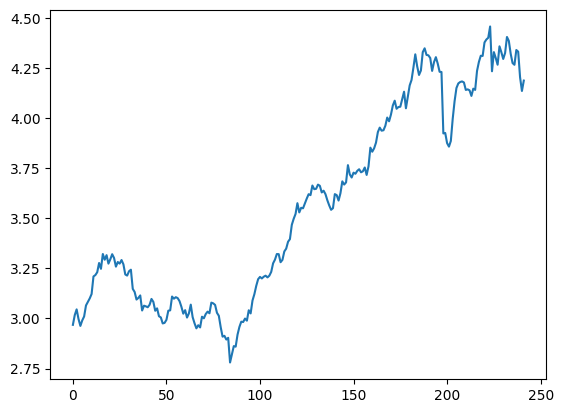

In [94]:
plt.plot(y_test)

In [95]:
pred_price = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


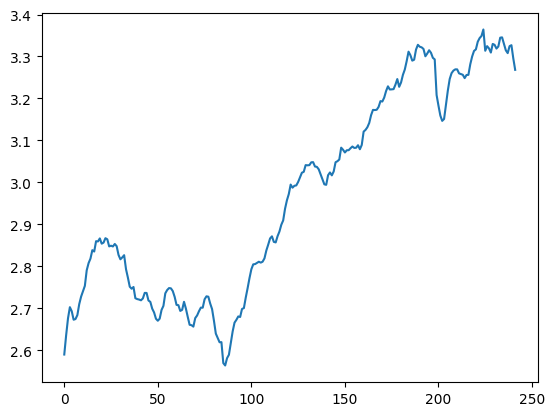

In [151]:
plt.plot(pred_price)

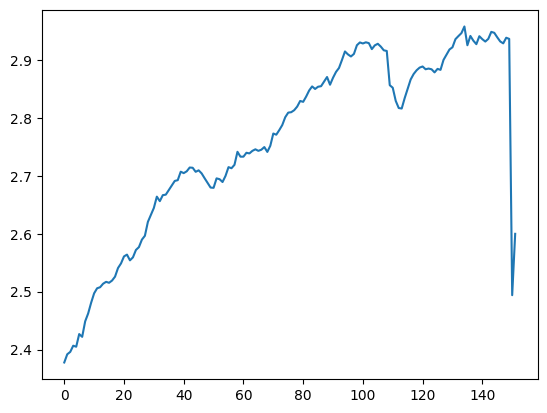

In [215]:
plt.plot(prices)

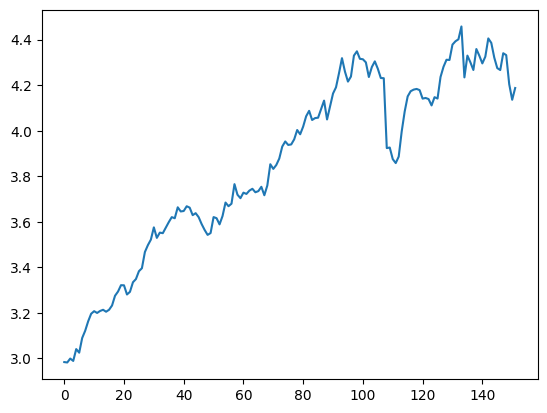

In [216]:
plt.plot(test_data[100:])

>Here model is trained with 3 days prediction, it gives some better rus